Stroop Effect (斯特鲁普效应) \\  
In psychology, the Stroop effect is the delay in reaction time between congruent and incongruent stimuli.

The effect has been used to create a psychological test (the Stroop test) that is widely used in clinical practice and investigation.

A basic task that demonstrates this effect occurs when there is a mismatch between the name of a color (e.g., "blue", "green", or "red") and the color it is printed on (i.e., the word "red" printed in blue ink instead of red ink). When asked to name the color of the word it takes longer and is more prone to errors when the color of the ink does not match the name of the color. \\

斯特鲁普效应（英语：Stroop Effect），又译Stroop效应、司楚卜效应、史楚普效应[1]，是由美国的实验心理学家约翰·莱德利·斯特鲁普于1935年最先以英语提出的效应，因此以他的名字命名。[2]

这个效应展示了人们对事物的认知过程已是一个自动化的历程。当有一个新的刺激出现时，如果它的特征和原先的刺激相似或符合一致，便会加速人们的认知；反之，若新的刺激特征与原先的刺激不相同，则会干扰人们的认知，使人们的所需的反应时间变长[3]。

在心理学中，斯特鲁普效应是干扰对处理任务时反应时间的论证。例如，将一个颜色的名称（例如“蓝色”、“绿色”、“红色”、“橘色”）以不是它所代表的颜色显示时（例如文字“红色”以绿色油墨显示，而非红色油墨；或是文字“橘色”是以蓝色油墨显示而非橘色油墨），对比于文字及其颜色一致时，前者必须花较长的时间来辨识文字的颜色，而且辨识过程也更容易出错。斯特鲁普效应也被用来创造一个心理学上著名的实验，即“斯特鲁普实验”（Stroop Test），或称为“斯特鲁普颜色与文字实验”（Stroop Color and Word Test，简称SCWT）。[4][5]

斯特鲁普颜色与文字实验（SCWT）是一个在神经心理学领域被广泛运用于临床与调查中的实验。此实验评估人们在处理一个特定刺激特征、而此刺激妨碍同时第二个刺激特性的处理时，抑制认知干扰的能力。 \\
(https://zh.wikipedia.org/wiki/%E6%96%AF%E7%89%B9%E9%B2%81%E6%99%AE%E6%95%88%E5%BA%94)



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
save_path = '/content/drive/My Drive/Colab Datasets'
os.chdir(save_path)

In [0]:
#Read data 
import pandas as pd
df = pd.read_csv('斯特鲁普数据集.csv')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [0]:
# 描述性统计信息
#第一组
col1_mean = df['Congruent'].mean()
col1_std = df['Congruent'].std()

#第二组
col2_mean = df['Incongruent'].mean()
col2_std = df['Incongruent'].std()

In [8]:
print('第一组-字体和颜色一致时，被测者平均反应时间\n', col1_mean, '秒\n反应时间标准差\n', col1_std, '秒')
print('第二组-字体和颜色不一致时，被测者平均反应时间\n', col2_mean, '秒\n反应时间标准差\n', col2_std, '秒')

第一组-字体和颜色一致时，被测者平均反应时间
 13.926875000000003 秒
反应时间标准差
 3.5402194271529703 秒
第二组-字体和颜色不一致时，被测者平均反应时间
 22.35075 秒
反应时间标准差
 5.010217727196399 秒


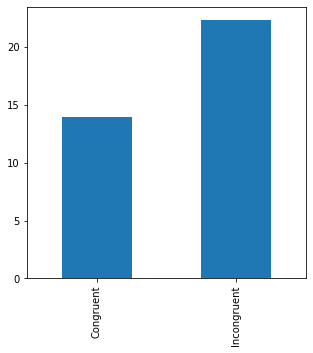

In [9]:
fg = plt.figure(figsize = (5, 5))
ax = fg.add_subplot(1,1,1)
df.mean().plot(kind = 'bar', ax = ax)
plt.show()

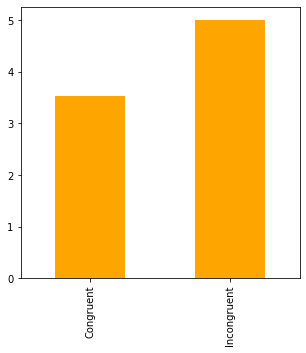

In [11]:
fg = plt.figure(figsize = (5, 5))
ax = fg.add_subplot(1,1,1)
df.std().plot(kind = 'bar', ax = ax, color = 'orange')
plt.show()

In [0]:
# 假设检验
# Null Hypothesis(H0): Congruent组与Incongruent组识别时间均值没有差异 (Col1_mean = Col2_mean)
# Alternative Hypothesis(H1): Congruent组与Incongruent组识别时间均值有差异 (Col1_mean != Col2_mean)

In [13]:
# 选择检验方法
# paired t- test
df['Deviance'] = df['Congruent'] - df['Incongruent']
df.head()

,Congruent,Incongruent,Deviance
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


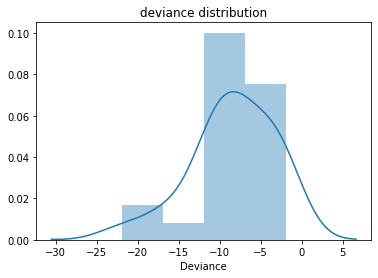

In [15]:
# 查看数据分布
import seaborn as sns
sns.distplot(df['Deviance'])
plt.title('deviance distribution')
plt.show() # the distribution is near normal, thus fits requirement of t-test

In [16]:
# 根据Stroop Effect的定义，一致条件和不一致条件比，反应时显著地小（ mean1 < mean2 ）
# left tail t-test, significance level = 5%, df = n-1 = 23
# compute p-value
from scipy import stats
t, p_twoTail = stats.ttest_rel(df['Congruent'], df['Incongruent'])
p_oneTail = p_twoTail/2
print('t值 = ', t, '\n单位检验p值=', p_oneTail) 

t值 =  -8.088610872807587 
单位检验p值= 1.7743595748624577e-08


In [20]:
a = 0.05
# draw conclusion
if (t<0 and p_oneTail < a):
  print('有统计显著的证据，拒绝零假设')
  print('证明Stroop Effect成立')
else:
  print('没有统计显著的证据，无法拒绝零假设')
  print('无法证实Stroop Effect')

有统计显著的证据，拒绝零假设
证明Stroop Effect成立


In [25]:
# 置信区间
t_ci = 2.069
sample_mean = df['Deviance'].mean()
se = stats.sem(df['Deviance'])
lower = sample_mean - t_ci*se
upper = sample_mean + t_ci*se
print('两组平均值差值的置信区间，.95的置信水平 CI=[%f,%f]' % (round(lower,2), round(upper,2)))

两组平均值差值的置信区间，.95的置信水平 CI=[-10.580000,-6.270000]


In [24]:
# 效应量
pop_mean = 0
sample_std = df['Deviance'].std()
d = (sample_mean - pop_mean)/ sample_std
print('d = ', d)

d =  -1.6510807805255563
